# Mathematik für Biologiestudierende

Wintersemester 2025/26

28.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* Vorhersagen
* zwei Arten von Konfidenzintervallen bei Vorhersagen
* lineare Modelle mit kategoriellen Daten

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf  #   <-----  neu

# Vorhersagen (prediction)

In [2]:
galton = pd.read_csv('galton.csv') 
galton.describe()

,father,mother,midparentHeight,children,childNum,childHeight
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,69.137630,64.033264,69.146778,6.008316,2.257796,69.234096
std,2.305767,2.321623,1.775891,2.669257,1.402404,2.623905
min,62.000000,58.000000,64.400000,1.000000,1.000000,60.000000
25%,68.000000,63.000000,68.020000,4.000000,1.000000,67.500000
50%,69.000000,64.000000,69.180000,6.000000,2.000000,69.200000
75%,70.500000,66.000000,70.140000,8.000000,3.000000,71.000000
max,78.500000,70.500000,75.430000,15.000000,10.000000,79.000000


In [3]:
formel = 'childHeight ~ father + mother'

* In dieser Formel sind `father` und `mother` die erklärenden und `childHeight` die abhängige Variable
* Die erklärenden Variablen heißen auch *exogen*, die abhängigen *endogen*
* englisch:
  * abhängig: *dependent* oder *outcome variable*
  * erklärend:  *predictor*    

In [4]:
modell = smf.ols(formel, galton)
res = modell.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.25e-29
Time:                        09:51:30   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Aufgabe:  Welche Größe erwarten wir für den Sohn eines 70" großen Vaters und einer 69.8" großen Mutter?

* In der Sprache der linearen Modelle handelt es sich um eine Vorhersage, engl. *prediction*

* Wir verwenden nun die Methode `get_prediction`
* Dazu müssen die Daten der erklärenden Variablen in einen DataFrame geschrieben werden

In [5]:
anfrage = pd.DataFrame()
anfrage['father'] = [70]
anfrage['mother'] = [69.8]
#  rechte Seite ist immer ein array, auch wenn nur ein Wert berechnet werden soll
anfrage

,father,mother
0,70,69.8


In [6]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,71.490133,0.280977,70.938031,72.042235,66.946235,76.034032


* Man erwartet, dass der Sohn 71.49" groß ist

* `mean`:  Wert, der im Mittel zu erwarten ist
* `mean_se`:  Standardabweichung für `mean`

* die vier anderen Werte sind untere bzw. obere Grenzen für Konfidenzintervalle
* `mean_ci` ist das Konfidenzintervall für den mittleren zu erwartenden Wert
* `obs_ci` ist das Konfidentintervall für den individuell zu beobachtenden Wert (engl: "observed")

# Konfidenzintervalle für den Mittelwert bzw. für die erwarteten Beobachtungen 

* `mean_ci_lower` und `mean_ci_upper` begrenzen das Konfidenzintervall für den Erwartungswert

* `obs_ci_lower` und `obs_ci_upper` begrenzen einen Bereich, der 95% der erwarteten Beobachtungen enthält

#### Beispiel:  Fische

* Fische werden gezüchtet.  In den ersten 24 Monaten wurden die folgenden Daten erhoben
* Diesen Daten werden benutzt, um das Wachstum der nächsten Generation zu prognostizieren

In [7]:
fische = pd.read_csv('fische.csv')
fische.describe()

,Monat,Höhe,Gewicht
count,70.000000,70.000000,70.000000
mean,13.228571,59.642117,1105.057055
std,6.169517,28.007176,518.587535
min,4.000000,15.810711,311.151315
25%,8.000000,35.186821,644.176651
50%,13.000000,56.927136,1087.083527
75%,19.000000,87.382391,1609.153006
max,23.000000,108.537802,1992.998583


* Gewicht in g
* Höhe in mm

* Ein Züchter hat 1200 Fische in seinen Teichen, die alle gleichzeitig geschlüpft sind
* erste Frage:  Was ist das Konfidenzintervall für das Gesamtgewicht dieser Fische nach 18 Monaten zum Konfidenzniveau 95%?
* zweite Frage:  Wie muss das Netz gewählt werden, um nach 18 Monaten 97.5% der Fische zu fangen?

In [8]:
formel1 = 'Gewicht ~ Monat'
modell1 = smf.ols(formel1, fische)

In [9]:
res = modell1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Gewicht   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     8866.
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           9.01e-74
Time:                        09:51:30   Log-Likelihood:                -365.66
No. Observations:                  70   AIC:                             735.3
Df Residuals:                      68   BIC:                             739.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6497     12.964     -0.204      0.839     -28.519      23.219
Monat         83.7359      0.889     94.161      0.000      81.961      85.510
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.556
Skew:                          -0.198   Prob(JB):                        0.169
Kurtosis:                       4.030   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
anfrage_fische = pd.DataFrame()
anfrage_fische['Monat'] = [18]
res.get_prediction(anfrage_fische).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1504.597078,6.904729,1490.818905,1518.375251,1412.618172,1596.575983


* untere Vertrauensgrenze für das Gesamtgewicht von 1200 Fischen in kg:

In [11]:
1200 * 1490.8 / 1000

1788.96

Mit 97.5% Sicherheit werden mindestens 1789 kg Fisch geerntet

In [12]:
formel2 = 'Höhe ~ Monat'
modell2 = smf.ols(formel2, fische)
res_hoehe = modell2.fit()
res_hoehe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Höhe   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           3.13e-81
Time:                        09:51:30   Log-Likelihood:                -143.68
No. Observations:                  70   AIC:                             291.4
Df Residuals:                      68   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2723      0.544     -0.501      0.618      -1.358       0.813
Monat          4.5292      0.037    121.402      0.000       4.455       4.604
==============================================================================
Omnibus:                        3.746   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.670
Skew:                           0.521   Prob(JB):                        0.160
Kurtosis:                       2.583   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
res_hoehe.get_prediction(anfrage_fische).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,81.252727,0.289668,80.674704,81.83075,77.394018,85.111436


Um 97.5% der Fische zu fangen, muss das Netz so beschaffen sein, dass ein Fisch der Höhe 77.4mm nicht hindurch schlüpft

* Jetzt dasselbe nochmal für das Konfidenzniveau 0.99
* Achtung: `alpha` eingeben für Konfidenzniveau $1-\alpha$

In [14]:
res_hoehe.get_prediction(anfrage_fische).summary_frame(alpha=0.01)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,81.252727,0.289668,80.485083,82.020371,76.128171,86.377283


# Lineare Modelle mit kategoriellen Daten

In [15]:
kinder = pd.read_csv('kinder.csv')
kinder.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


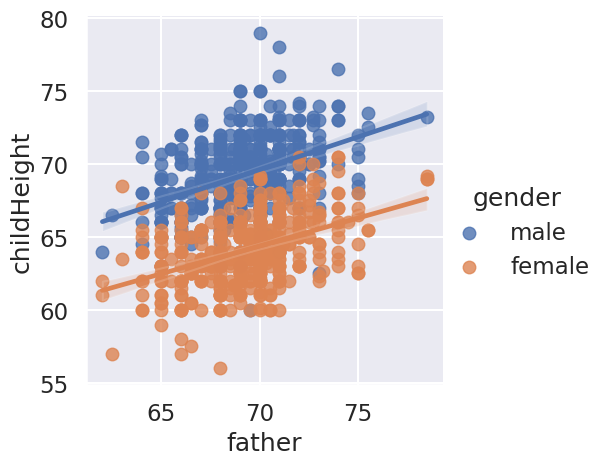

In [16]:
sns.lmplot(kinder, x='father', y='childHeight', hue='gender');

In [17]:
formel = 'childHeight ~ father + mother + gender'
modell = smf.ols(formel, kinder)

In [18]:
res = modell.fit()

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     540.3
Date:                Wed, 28 Jan 2026   Prob (F-statistic):          3.38e-203
Time:                        09:51:31   Log-Likelihood:                -2044.6
No. Observations:                 934   AIC:                             4097.
Df Residuals:                     930   BIC:                             4117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.5212      2.727      6.058      0.000      11.169      21.873
gender[T.male]     5.2150      0.142     36.775      0.000       4.937       5.493
father             0.3928      0.029     13.699      0.000       0.337       0.449
mother             0.3176      0.031     10.245      0.000       0.257       0.378
==============================================================================
Omnibus:                       11.156   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.397
Skew:                          -0.114   Prob(JB):                     0.000453
Kurtosis:                       3.586   Cond. No.                     3.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hier wird eine Fallunterscheidung kodiert

$$
    \text{childHeight} = 16.5212 + 0.3928 \cdot \text{father} + 0.13176 \cdot \text{mother} + 
    \begin{cases}
        0.0 & \text{wenn Mädchen,} \\
        5.215 & \text{wenn Junge.}
    \end{cases}
$$

Die Terminologie kommt offenbar aus der Pharmazie:

* `female` ist hier der Standard (engl. "default")
* alles, was vom Standard abweicht, ist eine Behandlung (engl. "treatment")
* daher `T.male`
* was default und was treatment ist, entscheidet das Programm

## Prediction im kategoriellen Fall

In [20]:
anfrage['gender'] = ['male']
anfrage

,father,mother,gender
0,70,69.8,male


In [21]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,71.404445,0.204411,71.003284,71.805607,67.137301,75.671589


* Vorhin war 71.49 herausgekommen
* Dies ist kein Rundungsfehler
* Es wird eine gemeinsame Steigung für alle Kinder berechnet

#### Beispiel Ratten

Wir kommen zu dem Rattenbeispiel aus Lektion 26 zurück:

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [22]:
ratten = pd.read_csv('ratten.csv')

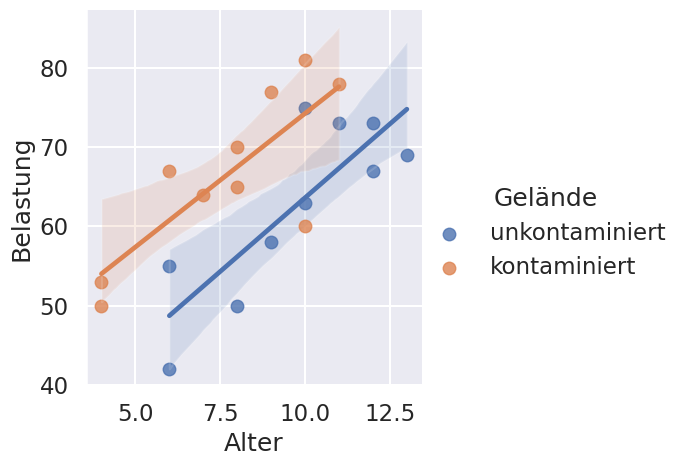

In [23]:
sns.lmplot(ratten, x='Alter', y='Belastung', hue='Gelände');

* Der t-Test zeigte keinen Unterschied zwischen den Ratten auf kontaminierten und nicht kontaminiertem Gelände.
* Die Ratten auf dem kontaminierten Gelände sind aber im Schnitt jünger.  
* Wir wollen 9 Monate alte Ratten vergleichen

In [24]:
ratten['Differenz_zu_9'] = ratten.Alter - 9
ratten.head()

,Alter,Belastung,Gelände,Differenz_zu_9
0,10,63,unkontaminiert,1
1,12,67,unkontaminiert,3
2,6,55,unkontaminiert,-3
3,6,42,unkontaminiert,-3
4,11,73,unkontaminiert,2


In [25]:
formel = "Belastung ~ Differenz_zu_9 + Gelände"

In [26]:
modell = smf.ols(formel, ratten)
res = modell.fit()

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Belastung   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     17.52
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           7.42e-05
Time:                        09:51:31   Log-Likelihood:                -63.935
No. Observations:                  20   AIC:                             133.9
Df Residuals:                      17   BIC:                             136.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    71.1137      2.182     32.588      0.000      66.510      75.718
Gelände[T.unkontaminiert]   -11.0980      3.124     -3.552      0.002     -17.689      -4.507
Differenz_zu_9                3.5490      0.617      5.752      0.000       2.247       4.851
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.408
Skew:                          -0.346   Prob(JB):                        0.815
Kurtosis:                       3.102   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Der *p*-Wert von `Gelände[T.unkontaminiert]` ist 0.002
* Das ist der *p*-Wert des zweiseitigen Test auf Unterschiede des Bleigehalts bei 9 Monate alten Ratten

# Zweite Probeklausur

* Am Sonntag, dem 01.02.2026, werde ich eine zweite Probeklausur veröffentlichen
* Diese wird am 04.02.2026 besprochen

* Am 30.01.2026 erscheinen die letzten Übungsaufgaben
* Am 03.02.2026 findet die Vorlesung wie gewohnt statt